# EECS 349 (Machine Learning) Homework 9

## How to submit your homework

1. Create a PDF document containing answers to the homework questions
2. Include source code for the program you write
2. If working with a partner, clearly state who you're working with **at the top of the PDF document**.
3. Compress all of the files specified into a .zip file
4. Name the file in the following manner, firstname_lastname_hw9.zip.
5. Submit this .zip file via Canvas by the date specified on Canvas

## You can work in pairs
In this homework, you will work on your own **or in pairs** to complete a classification task on a dataset of handwritten digits. 

## The data set
The dataset is included with this assignment (train-images-idx3-ubyte, train-labels-idx1-ubyte), and you can read more about it here: http://yann.lecun.com/exdb/mnist/ and you can read a paper that might help quite a bit here: http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf. 

## Scikit-learn
You also have to install scikit-learn, a machine learning library for Python, to answer questions in this homework: http://scikit-learn.org/stable/index.html

You should be running the latest stable version of scikit-learn (0.18.1,as of this writing). 

If you want an example of how to train and call a classifier from scikit-learn, have a look at the man page for the support vector machine.   
http://scikit-learn.org/stable/modules/svm.html#multi-class-classification

Most classifiers have similarly good documentation and are called in similar ways.

For easy-to-use model selection, cross validation, etc, check out this documentation
http://scikit-learn.org/stable/model_selection.html#model-selection

## Reading the MNIST data
We have given a helper file "mnist.py" (thanks to http://g.sweyla.com/blog/2012/mnist-numpy/) that you can use to read in the data as follows:

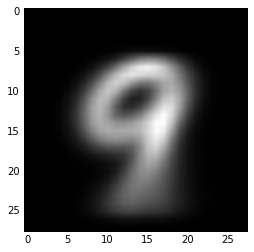

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mnist import load_mnist
%matplotlib inline

images, labels = load_mnist(digits=[9], path='.')
#Displaying the mean image for digit 9.
plt.imshow(images.mean(axis=0), cmap = 'gray')
plt.show()

That is what 9, when handwritten, looks like on average. Changing the digits argument to a list would give you all the images that match the labels in the list (e.g. digits = [0, 1, 2] would give you all the 0s, 1s, and 2s in MNIST). Setting path = '.' makes it look for the MNIST data in the current directory.

# *1) Exploring the data (1 points)*

To load the entire dataset, run the following:

In [2]:
images, labels = load_mnist(digits=range(0, 10), path='.')

Here each image[i] is a single handwritten image of the label[i]. For example, here's image[35], and it's label:

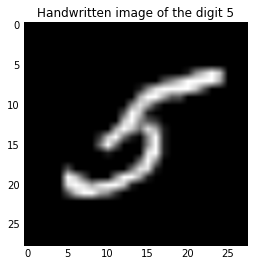

In [3]:
i = 35
plt.imshow(images[i], cmap = 'gray')
plt.title('Handwritten image of the digit ' + str(labels[i]))
plt.show()

It's a 5!

From this large dataset, you'll want to pick training and testing sets to build classifiers. To do this carefully, you'll need to study the dataset. Answer the following questions:

**A. (0.5 pt)** Look at 50 examples of one of the digits. Show us some of the cases that you think might be challenging to be recognized by a classifeir. Why do you think they may be challenging?

**B. (0.5 pt)**  How many images are there in total? How many images are there of each digit? You need to pick some subset of the data for training and testing. Pick a set of training and testing data. State how you selected your training and testing sets. Think about the goals of training and testing sets - we pick good training sets so our classifier generalizes to unseen data and we pick good testing sets to see whether our classifier generalizes. Justify your method for selecting the training and testing sets in terms of these goals.

# *2) Algorithm Selection (1 points)*

Each classifier in scikit-learn has associated with it many hyperparameters (e.g. number of neighbors in KNN). The goal of this assignment is to understand the effect that these hyperparameters have on performance as well as how different classifiers compare to one another.

You'll build two classifiers on the MNIST data. You must use scikit-learn to build these classifiers (http://scikit-learn.org/stable/). A page of particular note is: http://scikit-learn.org/stable/supervised_learning.html#supervised-learning.

Two different classifiers does not mean two different variants of a classifier. For example, two KNNs with two different K values are not different. Pick two different classification algorithms (e.g. SVM and Decision Tree).

Pick two classification algorithms you can use in the scikit-learn library. **For each classification algorithm**, do the following:

**A. (.5 pt)** At a high level (e.g. a paragraph or two), summarize how each algorithm works and how to use it for classification of images (e.g. how you would encode the data, how you would interpret the output of the classifier).

**B. (.5 pt)** For each hyperparameter of each algorithm (e.g. slack in an SVM, or K in a KNN), explain what it varies about the classification algorithm.

# *3) Classification (part 1) (2 points)*

Now that you've selected two classifiers, you will build, train and test each one. Pick one of the two classifiers chosen in problem 2 and do the following.

**A. (1 pt)** Build a classifier. Complete the following starter code (see below) named **classifier_1.py**. Read all comments in the code carefully.

You need to submit 4 files for this question:

- classifier_1.py
- classifier_1.p (model file)
- training_set_1.p
- training_labels_1.p

(*.p files are 'pickle' files. 'Pickling' is a way to convert a python object into a chracter stream so that it can be saved on disk)

**B. (1 pt)** Design, explain, and perform experiments to find the best hyperparameters for your classifier. Show the following graphs illustrating classification performance along two dimensions: 
1. Training set size vs performance on a testing set
2. Classifier parameters (e.g. number of neighbors in KNN) vs performance on a testing set
Describe and analyzise your result.
3. Show us a confusion matrix for the data.
Be sure to label your dimensions clearly on all graphs.


# *4) Classification (part 2) (2 points)*

### Repeat the same tasks from question 3 with the other classifier you described in question 2.

For Part (A), you the code you hand in must be in files with the following names:
- classifier_2.py
- classifier_2.p (model file)
- training_set_2.p
- training_labels_2.p

# *5) Visualizing misclassifications (1 points)*

Visualizing misclassifications can sometimes help understand the behavior of a classifier. Show a set of images that were misclassified by each of your two classifiers. Report how it affects your understanding of the behavior of the classifier, or the dataset. How does this relate to the images you thought might be challenging in the section "Exploring the dataset" above?

# *6) Model comparison (1 points)*

Compare your two classifiers. Which classifier performed better? Back up that assertion by citing results from your experiment. Why do you think this classifier has better performance?  

# *7) Boosting (2 points)*

Boosting is a way to improve classification performance by combining classifiers. Perform the adaboosting algorithm on your training and testing set by using the AdaBoostClassifier function in sckit-learn.

Answer the following questions and submit a python script named **boosting.py** that includes two functions, boosting_A( ) and boosting_B( ). Each function takes a training and a testing set and their labels, and returns predicted labels and confusion matrix. Since we deal with 10 classes (0 - 9), the confusion matrix should be a 10x10 array.

** A. (0.5 pt)** Try adaboosting with a weak classifer (default classifer of the AdaBoostClassifier function). Include a confusion matrix in your write-up. Does the boosting outperform classifers you built in the question 2?

** B. (0.5 pt)** Try adaboosting with an SVM classifier. Before performing boosting, you might need to find best hyperparameters for the SVM first. Include a confusion matrix in your write-up. Does the boosted classifier outperform the classifers you built in question 2?

** C. (1 pt)** Compare two boosted classifiers, one from **A** and the other from **B**. Which one is better? How did you compare their performances? Show us data.

In [4]:
len(images)

60000

In [5]:
for i in range(10):
    print 'Number of examples labeled ' + str(i) + ' : ' + str(len(filter(lambda x:labels[x]==i,range(len(images)))))

Number of examples labeled 0 : 5923
Number of examples labeled 1 : 6742
Number of examples labeled 2 : 5958
Number of examples labeled 3 : 6131
Number of examples labeled 4 : 5842
Number of examples labeled 5 : 5421
Number of examples labeled 6 : 5918
Number of examples labeled 7 : 6265
Number of examples labeled 8 : 5851
Number of examples labeled 9 : 5949


In [3]:
ar = [[],[],[],[],[],[],[],[],[],[]]
for i in range(len(images)):
    ar[labels[i]].append(i)

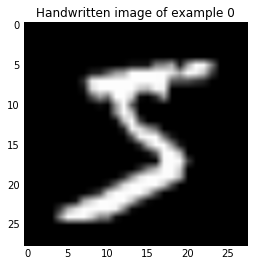

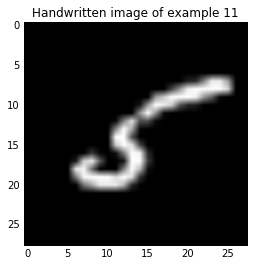

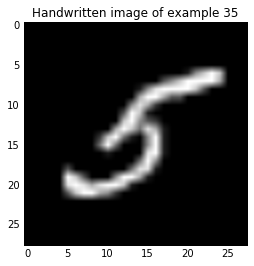

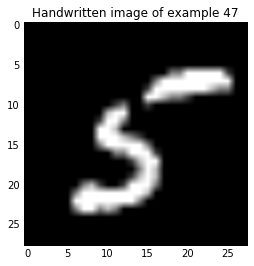

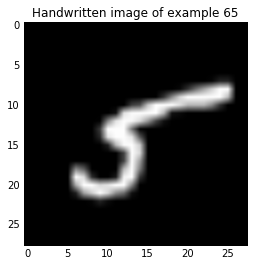

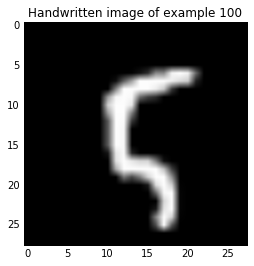

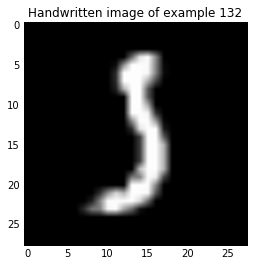

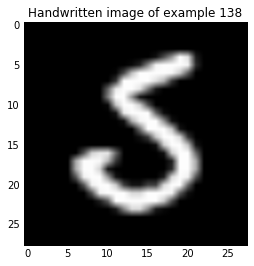

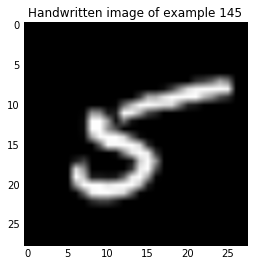

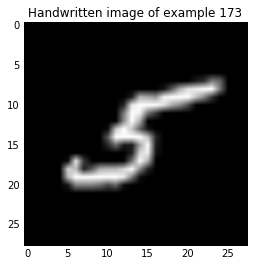

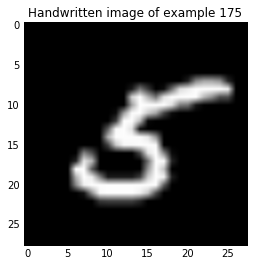

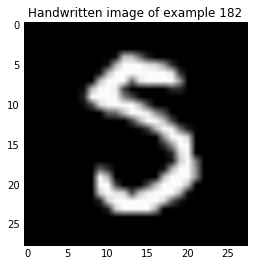

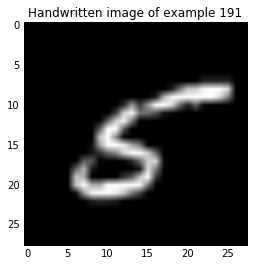

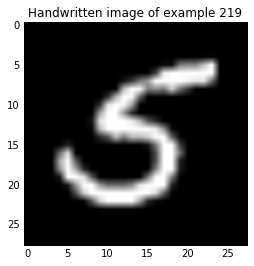

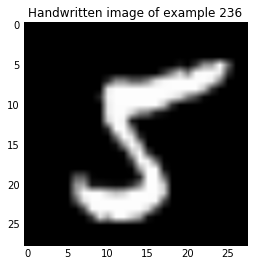

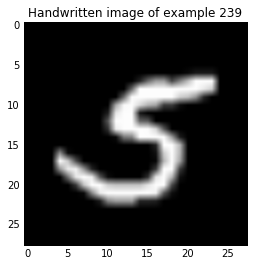

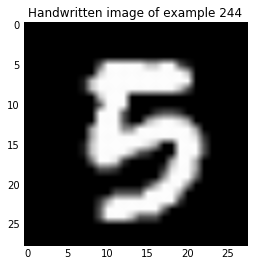

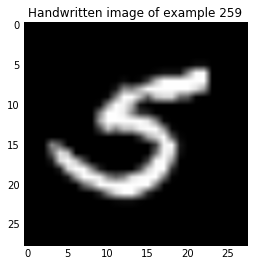

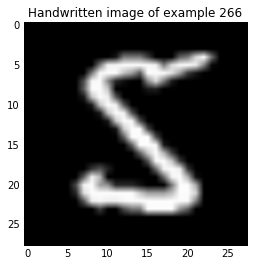

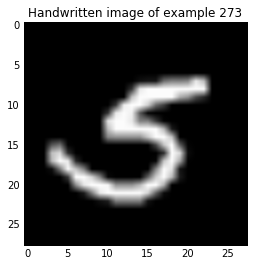

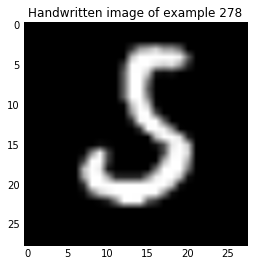

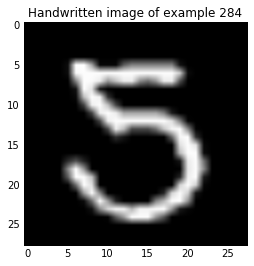

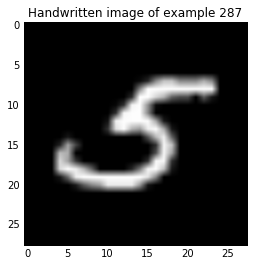

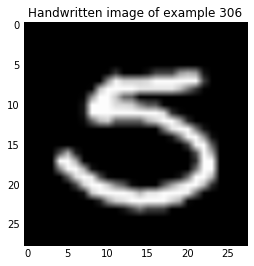

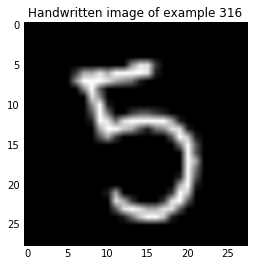

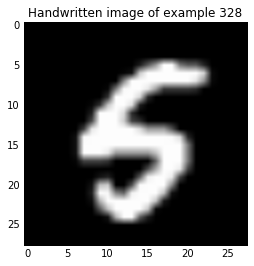

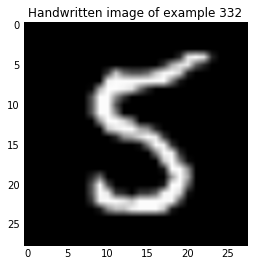

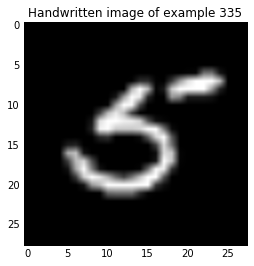

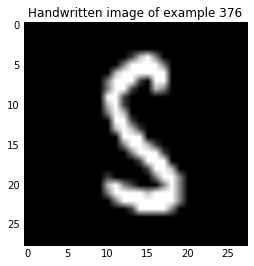

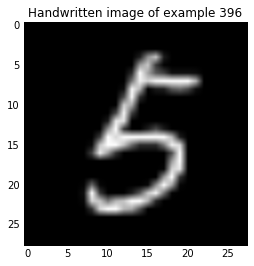

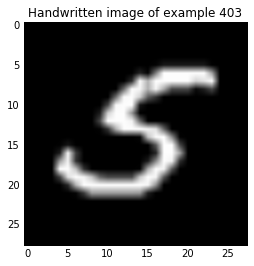

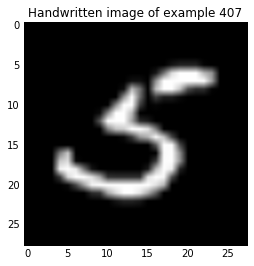

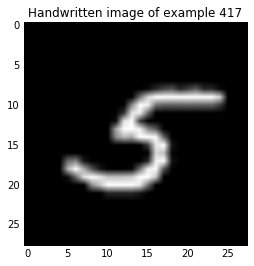

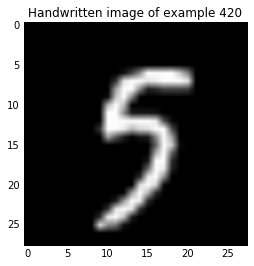

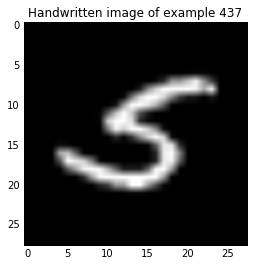

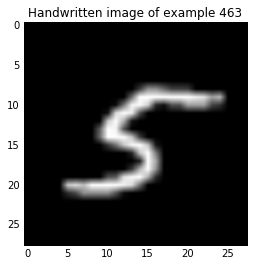

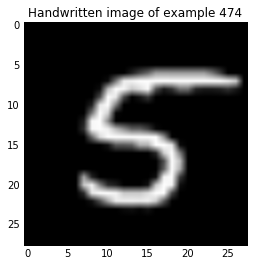

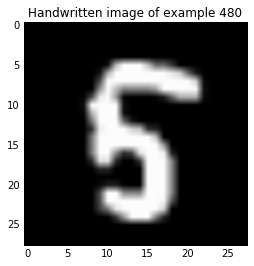

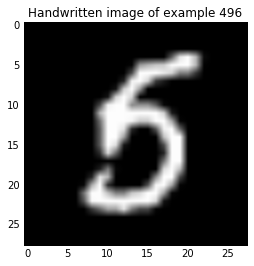

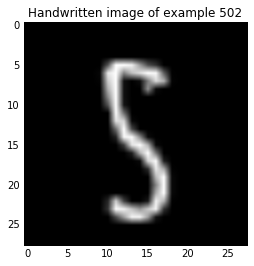

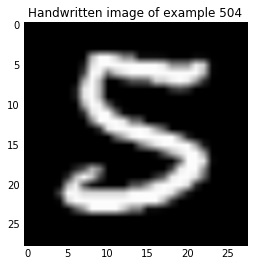

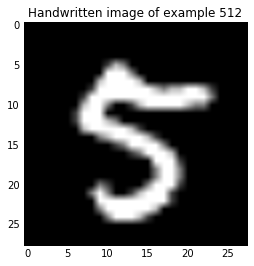

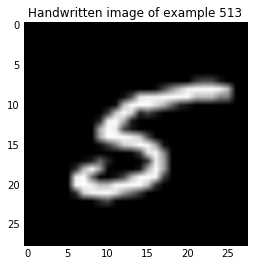

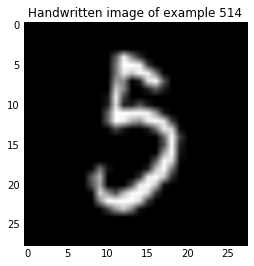

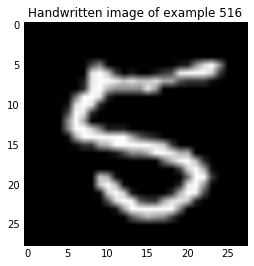

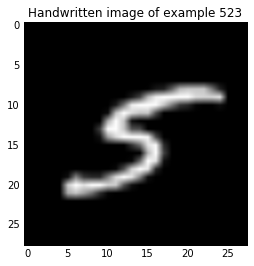

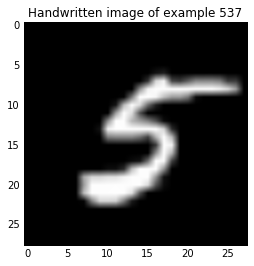

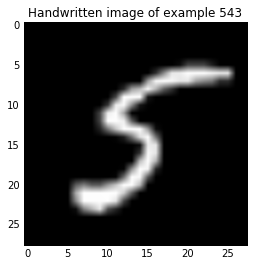

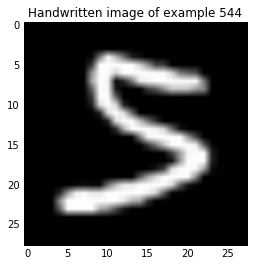

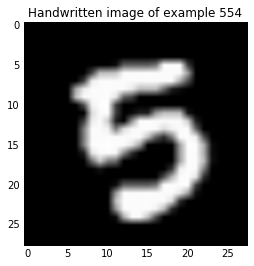

In [7]:
for i in range(50):
    plt.imshow(images[ar[5][i]], cmap = 'gray')
    plt.title('Handwritten image of example ' + str(ar[5][i]))
    plt.show()

In [4]:
training_data = []
training_labels = []
testing_data = []
testing_labels = []
for i in range(10):
    s = np.random.uniform(0,1,len(ar[i]))
    for j in range(len(ar[i])):
        # Appending the 2-d array for the image and its label
        val = images[ar[i][j]]
        if (s[j]<0.1):
            training_data.append(val)
            training_labels.append(i)

In [9]:
import pickle
pickle.dump( training_data, open( "training_set_1.p", "wb" ) )
pickle.dump( training_labels, open( "training_labels_1.p", "wb" ) )
pickle.dump( testing_data, open( "testing_set_1.p", "wb" ) )
pickle.dump( testing_labels, open( "testing_labels_1.p", "wb" ) )

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
flat_train = map(lambda l : [item for sublist in l for item in sublist],training_data)

In [12]:
flat_test = map(lambda l : [item for sublist in l for item in sublist],testing_data)

In [20]:
set_sizes = [0.1,0.2,0.3,0.4,0.5]
accs = []
for size in set_sizes:
    training = []
    t_labels = []
    for i in range(10):
        s = np.random.uniform(0,1,len(ar[i]))
        for j in range(len(ar[i])):
            # Appending the 2-d array for the image and its label
            val = images[ar[i][j]]
            if (s[j]<=size):
                training.append(val)
                t_labels.append(i)
    flat_train = map(lambda l : [item for sublist in l for item in sublist],training)
    KNN = KNeighborsClassifier(n_neighbors = 16,weights='distance')
    KNN.fit(flat_train,t_labels)
    accs.append(KNN.score(flat_test,testing_labels))

In [21]:
print accs

[0.94710743801652897, 0.96033057851239667, 0.97355371900826448, 0.98016528925619839, 0.98347107438016534]


In [23]:
sizes = [4,8,16,32,64,128]
scores = []
for size in sizes:
    KNN = KNeighborsClassifier(n_neighbors = size,weights='distance')
    KNN.fit(flat_train,t_labels)
    scores.append(KNN.score(flat_test,testing_labels))

In [24]:
print scores

[0.98512396694214877, 0.98347107438016534, 0.98347107438016534, 0.97685950413223144, 0.97190082644628095, 0.96694214876033058]


In [42]:
confusion_test = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0]]

In [26]:

KNN = KNeighborsClassifier(n_neighbors = 4,weights='distance')
KNN.fit(flat_train,t_labels)
pred = KNN.predict(flat_test)

TypeError: 'int' object is not iterable

In [43]:
for i,item in enumerate(testing_labels):
    confusion_test[item][pred[i]]+=1

In [44]:
pickle.dump(confusion_test,open('confusion_test.p','wb'))

In [45]:
confusion_full = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0]]
KNN = KNeighborsClassifier(n_neighbors = 4,weights='distance')
KNN.fit(flat_train,t_labels)
full_flat = map(lambda l : [item for sublist in l for item in sublist],images)
pred = KNN.predict(full_flat)
for i,item in enumerate(labels):
    confusion_full[item][pred[i]]+=1

In [46]:
pickle.dump(confusion_full,open('confusion_full.p','wb'))

In [47]:
pickle.dump(KNN,open('classifier_1.p','wb'))

In [48]:
confusion_full

[[5895, 4, 1, 0, 0, 4, 13, 1, 1, 4],
 [1, 6722, 4, 0, 2, 0, 2, 8, 1, 2],
 [22, 28, 5841, 10, 1, 2, 2, 40, 8, 4],
 [2, 7, 17, 6030, 0, 24, 1, 19, 13, 18],
 [1, 21, 1, 1, 5732, 0, 6, 9, 1, 70],
 [9, 4, 2, 29, 8, 5317, 27, 5, 8, 12],
 [9, 5, 1, 0, 4, 9, 5888, 0, 2, 0],
 [1, 34, 4, 1, 8, 0, 0, 6181, 2, 34],
 [6, 34, 10, 31, 20, 42, 14, 10, 5662, 22],
 [6, 3, 1, 21, 31, 7, 2, 30, 6, 5842]]

In [49]:
temp = 0
for i in range(10):
    temp+=confusion_full[i][i]
print 'Accuracy ' + str(temp/float(len(labels)))

Accuracy 0.985166666667


In [50]:
wrong = []
pred_part = KNN.predict(flat_test)
for i,item in enumerate(pred_part):
    if testing_labels[i]!=item:
        wrong.append(testing_data[i])

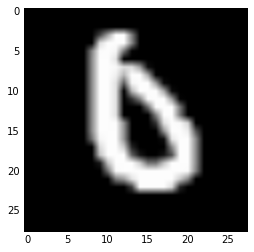

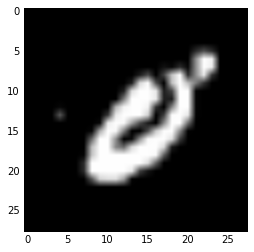

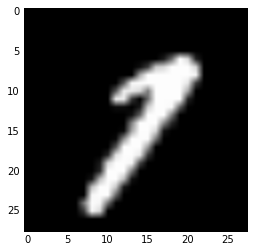

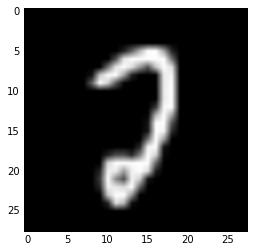

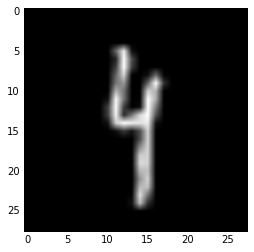

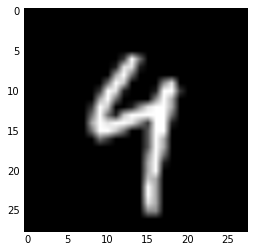

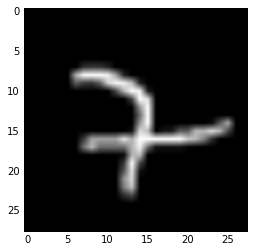

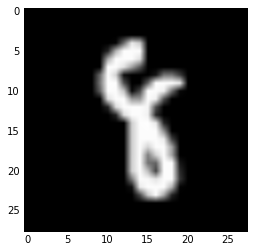

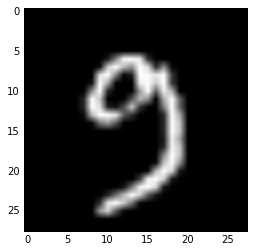

In [52]:
for item in wrong:
    plt.imshow(item, cmap = 'gray')
    plt.show()

In [54]:
confusion_test

[[70, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [0, 65, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 56, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 73, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 55, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 64, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 49, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 58, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 47, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 59]]

In [55]:
accuracy = 0
for i in range(10):
    temp+=confusion_test[i][i]
print 'Accuracy ' + str(temp/float(len(testing_labels)))

Accuracy 98.6876033058


In [6]:
from sklearn.ensemble import AdaBoostClassifier

In [146]:
#No change in parameters seemed to affect the accuracy
Ada = AdaBoostClassifier(learning_rate=0.4)
Ada.fit(flat_train,t_labels)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.4, n_estimators=50, random_state=None)

In [147]:
Ada_conf = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0]]
Ada_pred = Ada.predict(full_flat)
for i,item in enumerate(labels):
    Ada_conf[item][Ada_pred[i]]+=1

In [148]:
Ada_conf

[[5143, 0, 157, 73, 13, 329, 60, 37, 85, 26],
 [1, 6324, 170, 40, 7, 53, 4, 13, 123, 7],
 [40, 269, 4360, 172, 122, 82, 329, 131, 408, 45],
 [100, 124, 182, 4449, 19, 486, 72, 122, 410, 167],
 [15, 21, 111, 30, 4497, 126, 29, 130, 158, 725],
 [100, 79, 94, 684, 131, 3641, 78, 34, 344, 236],
 [66, 78, 482, 24, 235, 323, 4544, 13, 150, 3],
 [24, 129, 126, 42, 174, 52, 0, 4953, 86, 679],
 [26, 246, 150, 421, 53, 166, 26, 21, 4539, 203],
 [26, 26, 69, 110, 316, 203, 0, 224, 150, 4825]]

In [149]:
get_acc = 0
for i in range(10):
    get_acc+=Ada_conf[i][i]

In [150]:
#0.4 - 78.8
print float(get_acc)/len(labels)

0.787916666667


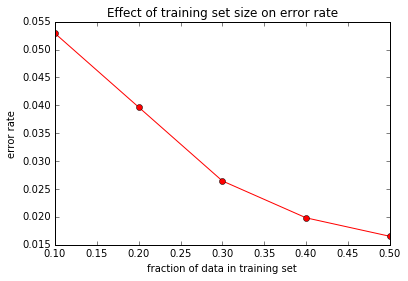

In [152]:
plt.plot([0.1,0.2,0.3,0.4,0.5],map(lambda x:1-x,accs),'ro-')
plt.xlabel('fraction of data in training set')
plt.ylabel('error rate')
plt.title('Effect of training set size on error rate')
plt.savefig('size.png')
plt.show()

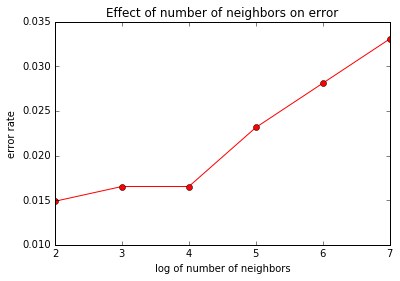

In [151]:
plt.plot([2,3,4,5,6,7],map(lambda x: 1-x,scores),'ro-')
plt.xlabel('log of number of neighbors')
plt.ylabel('error rate')
plt.title('Effect of number of neighbors on error')
plt.savefig('neigh.png')
plt.show()

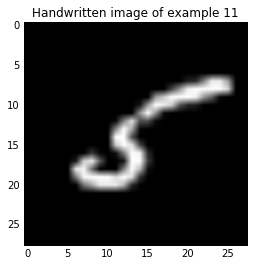

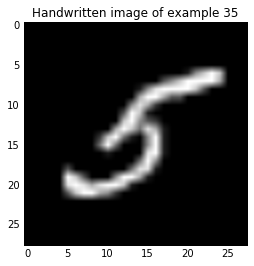

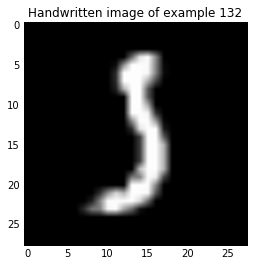

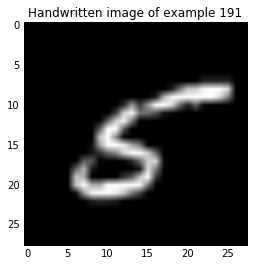

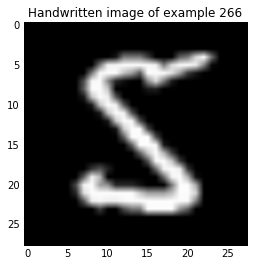

In [75]:
bad_5 = [11,35,132,191,266]
for i in bad_5:
    plt.imshow(images[i], cmap = 'gray')
    plt.title('Handwritten image of example ' + str(i))
    plt.savefig('bad_5_'+str(i)+'.png')
    plt.show()

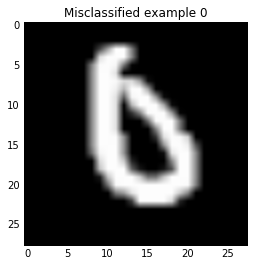

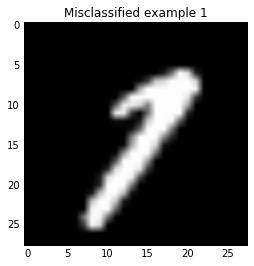

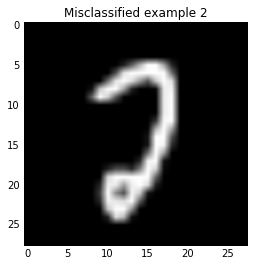

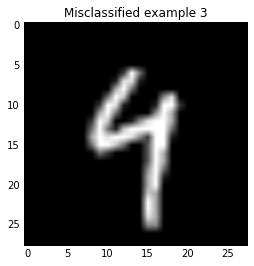

In [80]:
wrong_plot = [wrong[0],wrong[2],wrong[3],wrong[5]]
for i,item in enumerate(wrong_plot):
    plt.imshow(item, cmap = 'gray')
    plt.title('Misclassified example ' + str(i))
    plt.savefig('miss_'+str(i)+'.png')
    plt.show()

In [6]:
small_train = []
st_labels = []
for i in range(10):
    s = np.random.uniform(0,1,len(ar[i]))
    for j in range(len(ar[i])):
        # Appending the 2-d array for the image and its label
        val = images[ar[i][j]]
        if (s[j]<=0.1):
            small_train.append(val)
            st_labels.append(i)
small_flat = map(lambda l: [item for sublist in l for item in sublist],small_train)

In [10]:
full_flat = map(lambda l: [item for sublist in l for item in sublist],images)

In [7]:
Ada = AdaBoostClassifier(learning_rate=0.4)
Ada.fit(small_flat,st_labels)

NameError: name 'full_flat' is not defined

In [10]:
Ada_conf = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0]]
Ada_pred = Ada.predict(full_flat)
for i,item in enumerate(labels):
    Ada_conf[item][Ada_pred[i]]+=1
get_acc = 0
for i in range(10):
    get_acc+=Ada_conf[i][i]
print float(get_acc)/len(labels)
print Ada_conf

0.760316666667
[[4705, 0, 120, 75, 7, 770, 91, 59, 74, 22], [0, 6077, 261, 20, 5, 40, 2, 20, 302, 15], [36, 134, 4388, 192, 87, 96, 154, 132, 666, 73], [59, 116, 207, 4562, 18, 411, 26, 138, 426, 168], [8, 35, 147, 41, 4288, 95, 25, 226, 151, 826], [101, 69, 97, 732, 113, 3599, 51, 58, 451, 150], [56, 37, 1306, 28, 215, 309, 3751, 19, 193, 4], [22, 136, 147, 21, 233, 57, 0, 4780, 135, 734], [21, 108, 138, 378, 45, 131, 21, 25, 4724, 260], [21, 78, 92, 158, 211, 78, 1, 417, 148, 4745]]


In [7]:
from sklearn.svm import SVC

In [8]:
svm = AdaBoostClassifier(base_estimator=SVC(C=125,probability=True),learning_rate=0.4,n_estimators=10)
svm.fit(flat_train,training_labels)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=SVC(C=125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=0.4, n_estimators=10, random_state=None)

In [11]:
svm_conf = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0]]
svm_pred = svm.predict(full_flat)
for i,item in enumerate(labels):
    svm_conf[item][svm_pred[i]]+=1
svm_acc = 0
for i in range(10):
    svm_acc+=svm_conf[i][i]

NameError: name 'get_acc' is not defined

In [12]:
print float(svm_acc)/len(labels)
print svm_conf

0.8826
[[5613, 1, 66, 11, 28, 129, 40, 3, 18, 14], [0, 6620, 16, 17, 5, 30, 1, 11, 39, 3], [112, 116, 5085, 82, 130, 80, 105, 51, 184, 13], [51, 99, 69, 5121, 6, 374, 11, 72, 274, 54], [14, 46, 86, 0, 5268, 15, 40, 26, 54, 293], [66, 76, 12, 313, 81, 4345, 63, 17, 263, 185], [70, 40, 140, 6, 152, 126, 5344, 0, 40, 0], [13, 92, 81, 56, 91, 23, 1, 5471, 23, 414], [24, 287, 41, 124, 42, 297, 25, 24, 4889, 98], [34, 72, 45, 73, 200, 48, 2, 211, 64, 5200]]


In [13]:
import pickle 
pickle.dump(svm, open('svm.p','wb'))

In [6]:
from sklearn.svm import SVC
svc = SVC(C=125)
svc.fit(flat_train,training_labels)

SVC(C=125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
import pickle 
pickle.dump(svc,open('classifier_2.p','wb'))

In [9]:
pick = pickle.load(open('classifier_2.p'))

In [11]:
pick.predict(flat_train[:2])

array([0, 0])

In [12]:
pick2 = pickle.load(open('classifier_1.p'))